# Swash Surface Slope

### Mean surface slope of swash zone derived from first two points in GPS transect survey

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
root_path = '/Users/paulp/OneDrive - East Carolina University/Projects/USCRP_Pea_Island_2020_2021/'

data_path = '../Final_Data_Sets/'
data_file_name = 'PIBN_Bio_Env_NCDOT_CSI_2012-2020.csv'

plot_path = '../Final_Plots/'

In [4]:
def load_data(path, name):
    df_ = pd.read_csv(data_path+data_file_name)
    
    # create a new iso date time object field from existing sampling date:
    df_['iso_date'] = pd.to_datetime(df_['sample_date'])

    # to balance the design remove transects T-12 thru T-16 from the data:
    # we could have done this before the DOT to CSI label remapping but it would
    # have required additional code to detect the NT72,3,and 4 transects, too.
    df_.query("CSI_transect_ID != ['T12','T13','T14','T15','T16']", inplace=True)
    
    # create new survey field from existing sampling date:
    yr = df_['sample_date'].str[0:4]
    df_['year'] = yr
    mon = df_['sample_date'].str[5:7]
    df_['survey'] = mon+' '+yr
    
    # Finally, since winter doesn't present much bio data we will choose to drop all winter surveys:
    df_.query("season != ['winter']", inplace=True)
    
    # Finally, finally, drop a few more or less redundant surveys to reduce the 'noise' in the data:
    df_.query("survey != ['08 2015']", inplace=True)
    df_.query("survey != ['08 2016']", inplace=True)
    
    # integrity checks:
    print('Integrity checks:')
    print('Transect list:', df_['CSI_transect_ID'].unique())
    print('Areas:', df_['area'].unique())
    print('Epochs', df_['epoch'].unique())
    print(df_['season'].unique())
    
    return( df_ )

In [5]:
df = load_data(data_path, data_file_name)
df

Integrity checks:
Transect list: ['C11' 'C09' 'C07' 'C05' 'C03' 'C01' 'T03' 'T05' 'T07' 'T09' 'T11' 'T01'
 'T02' 'T04' 'T06' 'T08' 'T10' 'C02' 'C04' 'C06' 'C08' 'C10']
Areas: ['Control' 'Treatment']
Epochs ['prenourishment' 'postnourishment']
['spring' 'summer' 'autumn']


,transect_id,sample_date,year,season,CSI_transect_ID,NCDOT_transect_ID,data_origin,area,epoch,epoch_II,...,CSI_mbc_12in,ghost_crabs,sm_Emerita,md_Emerita,lg_Emerita,Donax,amphipods,worms,iso_date,survey
0,apr2012_C11,2012/04/17 00:00:00,2012,spring,C11,NT59,NCDOT,Control,prenourishment,prenourishment,...,NaN,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012
1,apr2012_C09,2012/04/17 00:00:00,2012,spring,C09,NT60,NCDOT,Control,prenourishment,prenourishment,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012
2,apr2012_C07,2012/04/17 00:00:00,2012,spring,C07,NT61,NCDOT,Control,prenourishment,prenourishment,...,NaN,2.0,0.0,1.0,0.0,0.0,1.0,0.0,2012-04-17,04 2012
3,apr2012_C05,2012/04/17 00:00:00,2012,spring,C05,NT62,NCDOT,Control,prenourishment,prenourishment,...,NaN,1.0,0.0,2.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012
4,apr2012_C03,2012/04/17 00:00:00,2012,spring,C03,NT63,NCDOT,Control,prenourishment,prenourishment,...,NaN,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2012-04-17,04 2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,oct2020_T07,2020/10/14 00:00:00,2020,autumn,T07,NT69,CSI,Treatment,postnourishment,postnourishment_6yr,...,200.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2020-10-14,10 2020
853,oct2020_T08,2020/10/14 00:00:00,2020,autumn,T08,NaN,CSI,Treatment,postnourishment,postnourishment_6yr,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020
854,oct2020_T09,2020/10/14 00:00:00,2020,autumn,T09,NT70,CSI,Treatment,postnourishment,postnourishment_6yr,...,100.0,4.0,4.0,1.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020
855,oct2020_T10,2020/10/14 00:00:00,2020,autumn,T10,NaN,CSI,Treatment,postnourishment,postnourishment_6yr,...,250.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,2020-10-14,10 2020


''

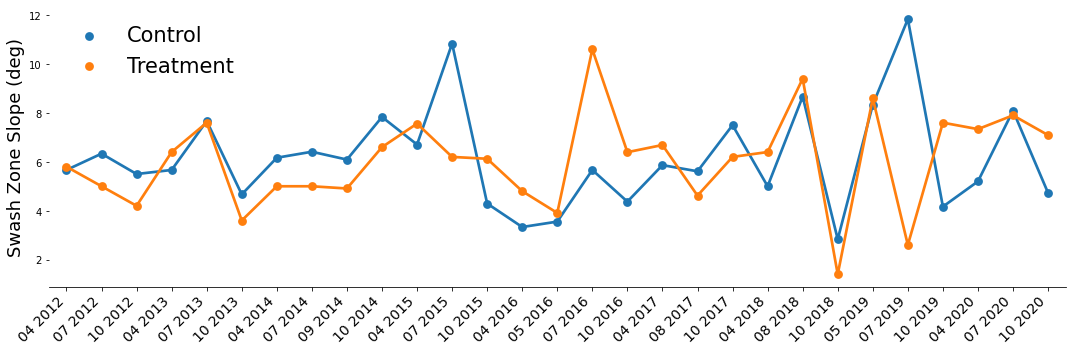

In [5]:
g = sns.catplot(x='survey', y='swash_slope_deg', hue='area', data=df, 
                kind='point',height=5, aspect=3.0, ci=None, legend=False)

g.set_axis_labels('', 'Swash Zone Slope (deg)', size=18)
g.despine(left=True)
#g.set_yticklabels(['0','5','10','15','20','25','30'], size = 16)
#g.set_xticklabels('')
g.set_xticklabels(rotation=45, ha='right', fontsize=14)
    
plt.legend(loc='upper left', fontsize=21, frameon=False)
#                plt.title('Swash Zone Beach Slope)', fontsize=18, loc='center')
plt.tight_layout()

plt.savefig(plot_path+'Beach_Slope_swash_pointplot.pdf')
;

In [ ]:
# Compute means, ranges, partition for pre and post and control vs impact

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 856
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transect_id               506 non-null    object        
 1   sample_date               506 non-null    object        
 2   year                      506 non-null    object        
 3   season                    506 non-null    object        
 4   CSI_transect_ID           506 non-null    object        
 5   NCDOT_transect_ID         385 non-null    object        
 6   data_origin               506 non-null    object        
 7   area                      506 non-null    object        
 8   epoch                     506 non-null    object        
 9   epoch_II                  506 non-null    object        
 10  air_temp                  306 non-null    float64       
 11  water_temp                296 non-null    float64       
 12  wave_ht               

In [8]:
df['swash_slope_deg'].describe()

count    506.000000
mean       6.008893
std        3.056611
min       -0.800000
25%        4.000000
50%        6.000000
75%        7.800000
max       21.000000
Name: swash_slope_deg, dtype: float64

In [7]:
print('Pre-replenishment Swash Zone Surface Slope (deg):', df['swash_slope_deg'].loc[df['epoch'] == 'prenourishment'].describe() )
print('Post-replenishment Swash zone Surface Slope (deg):', df['swash_slope_deg'].loc[df['epoch'] == 'postnourishment'].describe())

print('Control Area Swash Zone Surface Slope (deg):', df['swash_slope_deg'].loc[df['area'] == 'Control'].describe() )
print('Impact Area Swash zone Surface Slope (deg):', df['swash_slope_deg'].loc[df['area'] == 'Treatment'].describe() )

Pre-replenishment Swash Zone Surface Slope (deg): count    110.00000
mean       5.70000
std        2.57208
min        0.00000
25%        4.25000
50%        6.00000
75%        7.00000
max       14.00000
Name: swash_slope_deg, dtype: float64
Post-replenishment Swash zone Surface Slope (deg): count    396.000000
mean       6.094697
std        3.175714
min       -0.800000
25%        4.000000
50%        6.000000
75%        8.000000
max       21.000000
Name: swash_slope_deg, dtype: float64
Control Area Swash Zone Surface Slope (deg): count    265.000000
mean       5.946038
std        3.216057
min       -0.800000
25%        4.000000
50%        5.900000
75%        8.000000
max       21.000000
Name: swash_slope_deg, dtype: float64
Impact Area Swash zone Surface Slope (deg): count    241.000000
mean       6.078008
std        2.876191
min       -0.500000
25%        4.700000
50%        6.000000
75%        7.600000
max       19.000000
Name: swash_slope_deg, dtype: float64
